# GPU

Para correr con la GPU

In [1]:
import tensorflow as tf


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            
            tf.config.experimental.set_memory_growth(gpu, True)

        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "GPU(s) física(s),", len(logical_gpus), "GPU(s) lógica(s)")
    except RuntimeError as e:
        
        print(e)




1 GPU(s) física(s), 1 GPU(s) lógica(s)


In [2]:
tf.__version__

'2.10.1'

# Pip installs

In [4]:
pip install imblearn 

  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---------------------------------------  256.0/257.7 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.7 MB/s eta 0:00:00
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl (10.6 MB)
Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.3.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.3 kB ? eta -:--:--
     ---------------- -------------------- 71.7/162.3 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 1.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   --- ------------------------------------ 0.6/7.6 MB 12.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.6 MB 13.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.6 MB 16.0 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.6 MB 16.6 MB/s eta 0:00:01
   ----------------------- -

In [37]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras-tuner


# Imports

In [3]:
import os 
import requests
from zipfile import ZipFile 
import shutil #para copiar las imagenes de FER2013 y CK a data
import pandas as pd #para crear dataframe
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split #dividir la data de train en train ,test y val
from collections import Counter #para contar la cantidad de labels de cada generador
from keras.preprocessing.image import ImageDataGenerator #para crear el generador e iterador por dataframe o directory(), además pre-processing
import numpy as np 
import matplotlib.pyplot as plt #Gráficar
from keras.preprocessing import image 
from keras.callbacks import ModelCheckpoint #para crear un punto de control y guardar cada acc en cada epochs que mejore
from datetime import datetime #para tensorboard
from tensorflow.keras.callbacks import TensorBoard #para tensorboard
from keras.applications import InceptionResNetV2 
from keras.models import Sequential, Model 
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D 
import PIL

from keras.applications import EfficientNetB0
from keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,GlobalAveragePooling2D, Input
from keras.models import Model
from keras.regularizers import L2
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


In [4]:
import random, os
import numpy as np
import tensorflow as tf

def set_seed(seed=42):
  np.random.seed(seed) 
  tf.random.set_seed(seed) 
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)

set_seed()

# FER 2013

In [13]:
current_directory = os.getcwd()

# Se crea la carpeta donde se guarda los datos de Fer2013
os.makedirs('fer2013', exist_ok=True)

with ZipFile('fer2013.zip', 'r') as zip_ref: #se descomprime .zip a la carpeta de fer
    zip_ref.extractall('fer2013')

# CK+48

In [15]:
current_directory = os.getcwd()


# Se crea la carpeta donde se guarda los datos de CK+48
os.makedirs('CK+48', exist_ok=True)

with ZipFile('CK+48.zip', 'r') as zip_ref: #se descomprime .zip a la carpeta de CK+48
    zip_ref.extractall('CK+48')

# Análisis y preprocesamiento de datos

## Juntar datasets en una sola carpeta y labels respectivos a estudiar

In [60]:
import shutil

#Emociones a buscar
clases = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise","anger", "sadness"]

#Ubicación de los datasets
datafer_path= 'fer2013/train'
datack_path = 'CK+48/CK+48'

#Crear carpeta de cada emoción
os.makedirs('data', exist_ok=True)
os.makedirs('data/angry', exist_ok=True)
os.makedirs('data/disgust', exist_ok=True)
os.makedirs('data/fear', exist_ok=True)
os.makedirs('data/happy', exist_ok=True)
os.makedirs('data/neutral', exist_ok=True)
os.makedirs('data/sad', exist_ok=True)
os.makedirs('data/surprise', exist_ok=True)

#se lista las carpetas dentro de cada ubicación
clasesfer = os.listdir(datafer_path)
classck = os.listdir(datack_path)

output_path = 'data' #La carpeta de salida a mover los archivos


# FER
for emotion in clasesfer: #por cada carpeta(emocion) dentro de la carpeta fer
    if emotion in clases: #si esa carpeta tiene el mismo nombre de la lista a estudiar
        class_path = os.path.join(datafer_path, emotion) #que obtenga la ubicación con la emocion
        destination_folder = os.path.join(output_path, emotion) #se define la carpeta de destino a guardar
        os.makedirs(destination_folder, exist_ok=True) #se crea en caso de no haber carpeta destino
        for filename in os.listdir(class_path): #ahora ingresa a la carpeta de la emocion y los lista por cada archivo dentro
            source_file = os.path.join(class_path, filename) #obtiene la ubicación de cada archivo
            destination_file = os.path.join(destination_folder, filename) #define el destino nuevamente pero ahora con el archivo
            shutil.copy(source_file, destination_file) #copia el archivo a la carpeta destino

# CK
for emotion in classck:#por cada carpeta(emocion) dentro de la carpeta CK
    if emotion in clases: #si esa carpeta tiene el mismo nombre de la lista a estudiar
        class_path = os.path.join(datack_path, emotion) #que obtenga la ubicación con la emocion
        if emotion == 'anger': #si la emoción es anger (YA que este dataset en vez de angry dice anger)
            destination_folder = os.path.join(output_path, "angry") #se define la carpeta de destino a guardar
        elif emotion == "sadness": #si la emoción es anger (YA que este dataset en vez de sad dice sadness)
            destination_folder = os.path.join(output_path, "sad") #se define la carpeta de destino a guardar
        else: #en caso de no ser estas 2 emociones
            destination_folder = os.path.join(output_path, emotion) #se define la carpeta de destino a guardar para las otras emociones en la lsita
        os.makedirs(destination_folder, exist_ok=True) #se crea en caso de no haber carpeta destino
        for filename in os.listdir(class_path): #ahora ingresa a la carpeta de la emocion y los lista por cada archivo dentro
            source_file = os.path.join(class_path, filename) #obtiene la ubicación de cada archivo
            destination_file = os.path.join(destination_folder, filename) #define el destino nuevamente pero ahora con el archivo
            shutil.copy(source_file, destination_file) #copia el archivo a la carpeta destino

## Contar datos no balanceados de cada carpeta 

In [54]:
folder = 'data'
clasesData = os.listdir('data')

listaDatos = []

for emotion in clasesData:
    c=0
    class_path=os.path.join(folder, emotion)
    print('Ingreso a la clase llamada', emotion)
    for file in os.listdir(class_path):
        c=c+1
    listaDatos.append(c)

listaDatos

Ingreso a la clase llamada angry
Ingreso a la clase llamada disgust
Ingreso a la clase llamada fear
Ingreso a la clase llamada happy
Ingreso a la clase llamada neutral
Ingreso a la clase llamada sad
Ingreso a la clase llamada surprise


[4130, 613, 4172, 7422, 4965, 4914, 3420]

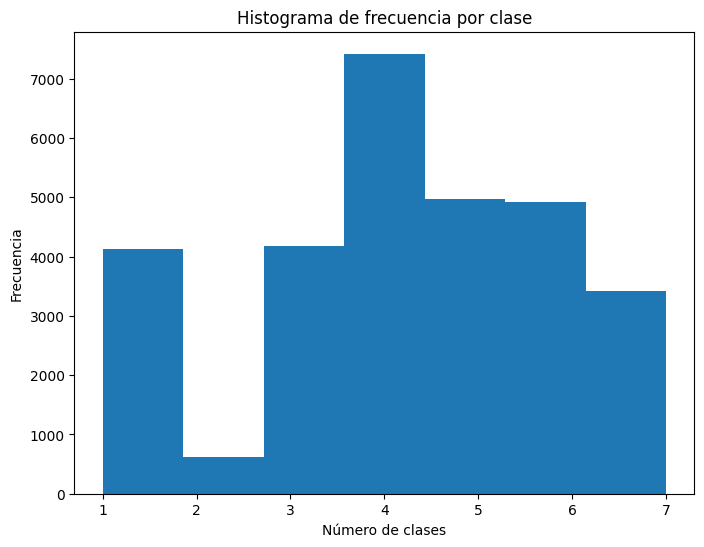

In [67]:
plt.figure(figsize=(8, 6))
plt.hist(x=range(1, len(listaDatos)+ 1), weights=listaDatos, bins=len(listaDatos))
plt.xlabel('Número de clases')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencia por clase')

plt.show()

Se puede ver que hay desbalanceo de datos

In [69]:
from PIL import Image

path = 'data/angry/S010_004_00000017.png'

img = Image.open(path)
img_np = np.asarray(img)

print('Dimensiones y canales', img_np.shape)

Dimensiones y canales (48, 48)


Las imágenes estan en 48,48,1. Se va a aplicar transformación hacia 3 canales mediante la replicación para poder entrenar con modelos Pre-entrenados que solicitan 3 canales

## Balanceo de datos mediante Data Augmentation

In [61]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


data_dir = 'data'

# La lista de las clases
classes = os.listdir(data_dir)

# Se balancea a 8.500 cada clase
max_images_per_class = 8500

# Parámetros de Data Augmentation leves para el Oversampling
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizar las imágenes
    rotation_range=10,  # Rango de rotación
    width_shift_range=0.04,  # Rango de desplazamiento horizontal 
    height_shift_range=0.04,  # Rango de desplazamiento vertical
    shear_range=0.05,  # Rango de inclinación
    zoom_range=0.05,  # Rango de zoom
    horizontal_flip=True,  # Voltear horizontalmente
    vertical_flip=False,  # No voltear verticalmente
    fill_mode='nearest'  # Relleno
)

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    
    # Aplicar Data Augmentation solo a las clases minoritarias
    if num_images < max_images_per_class: #Si el numero de imagenes de la clase es menor que 8.500
        print(f"Aplicando Data Augmentation a la clase: {class_name}")
        images_needed = max_images_per_class - num_images
        print(images_needed)

    while len(os.listdir(class_dir)) < max_images_per_class: #Que se aplique mientras la cantidad sea menor a 8.500
        for img_file in os.listdir(class_dir):
            if (len(os.listdir(class_dir)) == max_images_per_class): #si son iguales que salga
                break
            img_path = os.path.join(class_dir, img_file)
            
            # Carga la imagen
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            
            # Mediante batch de 1 imagen se va generando nuevas imagenes con las transformaciones y guardando en el mismo directorio
            for batch in datagen.flow(x, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
                break  


Aplicando Data Augmentation a la clase: angry
4370
Aplicando Data Augmentation a la clase: disgust
7887
Aplicando Data Augmentation a la clase: fear
4328
Aplicando Data Augmentation a la clase: happy
1078
Aplicando Data Augmentation a la clase: neutral
3535
Aplicando Data Augmentation a la clase: sad
3586
Aplicando Data Augmentation a la clase: surprise
5080


## Creación del dataframe mediante la ubicación y el label



In [5]:
data_dir = 'data' #se define la ubicación de la carpeta de los datos
filepath = [] #se define la lista donde van a estar todas las ubicaciones de cada imagen
labels = [] #se define la lista donde va a estar todos los labels
classes = os.listdir(data_dir) #lista las clases

for classfolder in classes: #por cada clase
    folderclass = os.path.join(data_dir, classfolder) #obtiene la ruta
    file_list = os.listdir(folderclass) #ingresa y los lista
    for files in file_list: #por cada archivo dentro de las clases
      pathfile = os.path.join(folderclass,files) #obtiene la ruta
      filepath.append(pathfile) #ingresa el path del file en filepath
      labels.append(classfolder) #ingresa el labels del file en labels



traindataframe = pd.DataFrame({'filepath': filepath, 'labels':labels})
#Se crea un dataframe que tenga una columna llamada filepath, donde va a tener la lista de las ubicaciones de las imagenes
#Se crea una columna llamada labels que va a tener la lista de los labels de cada file (filepath)

In [6]:
traindataframe

,filepath,labels
0,data\angry\aug_0_0.jpeg,angry
1,data\angry\aug_0_1.jpeg,angry
2,data\angry\aug_0_10.jpeg,angry
3,data\angry\aug_0_100.jpeg,angry
4,data\angry\aug_0_1000.jpeg,angry
...,...,...
59495,data\surprise\Training_99916297.jpg,surprise
59496,data\surprise\Training_99924420.jpg,surprise
59497,data\surprise\Training_99937001.jpg,surprise
59498,data\surprise\Training_99951755.jpg,surprise


In [57]:
traindataframe['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

## Contar datos ahora balanceados

In [72]:
traindataframe['labels'].value_counts()

labels
angry       8500
disgust     8500
fear        8500
happy       8500
neutral     8500
sad         8500
surprise    8500
Name: count, dtype: int64

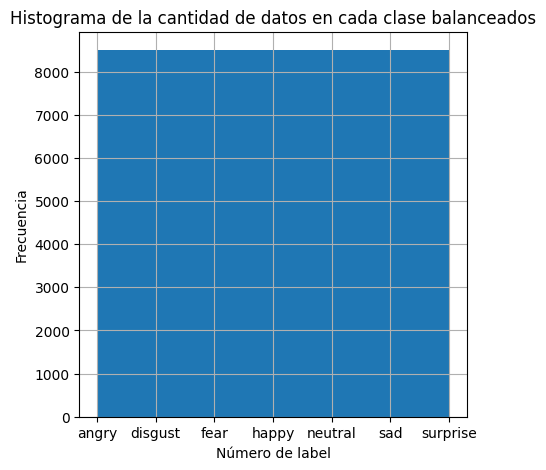

In [46]:
plt.figure(figsize=(5,5))
traindataframe['labels'].hist(bins=7)
plt.xlabel('Número de label')
plt.ylabel("Frecuencia")
plt.title("Histograma de la cantidad de datos en cada clase balanceados")
plt.show()

Ahora los datos estan balanceados en 8.500 datos

In [51]:
from PIL import Image

path_img = traindataframe['filepath'][0]

img = Image.open(path_img)
img_np = np.asarray(img)

print('Dimensiones y canales', img_np.shape)

Dimensiones y canales (48, 48, 3)


Además poseen dimensión de 48x48 con 3 canales, permitiendo el ingreso a modelos pre-entrenados

## División de train, val y test

In [7]:
#Se divide el dataset en train, test y val
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(traindataframe, test_size=0.1, stratify=traindataframe['labels'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['labels'], random_state=42)

train_df, test_df, val_df

(                                 filepath    labels
 29740    data\happy\Training_46880224.jpg     happy
 43976            data\sad\aug_0_4725.jpeg       sad
 10690        data\disgust\aug_0_3523.jpeg   disgust
 42001  data\neutral\Training_91168774.jpg   neutral
 49999      data\sad\Training_80899611.jpg       sad
 ...                                   ...       ...
 52632       data\surprise\aug_0_3897.jpeg  surprise
 38611  data\neutral\Training_28817271.jpg   neutral
 27217    data\happy\Training_15365662.jpg     happy
 43661            data\sad\aug_0_3893.jpeg       sad
 30000    data\happy\Training_49997455.jpg     happy
 
 [42840 rows x 2 columns],
                                filepath   labels
 36975      data\neutral\aug_0_8518.jpeg  neutral
 14171      data\disgust\aug_0_7487.jpeg  disgust
 31440   data\happy\Training_6815367.jpg    happy
 15978      data\disgust\aug_0_9549.jpeg  disgust
 13398      data\disgust\aug_0_6605.jpeg  disgust
 ...                               

In [8]:
from sklearn.preprocessing import LabelEncoder

# Se codifica las etiquetas a numéricas
le = LabelEncoder()
data_labels = le.fit_transform(train_df['labels'])


In [9]:
# Se obtiene los nombres de las clases
class_names = le.classes_

# Se obtiene los valores numéricos de cada clase
class_values = le.transform(class_names)

# Se imprime los nombres de las clases y sus valores numéricos
for name, value in zip(class_names, class_values):
    print(f'Clase: {name}, Valor: {value}')

Clase: angry, Valor: 0
Clase: disgust, Valor: 1
Clase: fear, Valor: 2
Clase: happy, Valor: 3
Clase: neutral, Valor: 4
Clase: sad, Valor: 5
Clase: surprise, Valor: 6


In [70]:
train_df

,filepath,labels
29740,data\happy\Training_46880224.jpg,happy
43976,data\sad\aug_0_4725.jpeg,sad
10690,data\disgust\aug_0_3523.jpeg,disgust
42001,data\neutral\Training_91168774.jpg,neutral
49999,data\sad\Training_80899611.jpg,sad
...,...,...
52632,data\surprise\aug_0_3897.jpeg,surprise
38611,data\neutral\Training_28817271.jpg,neutral
27217,data\happy\Training_15365662.jpg,happy
43661,data\sad\aug_0_3893.jpeg,sad


In [8]:
train_df['labels'].value_counts()

labels
happy       6120
sad         6120
disgust     6120
neutral     6120
surprise    6120
fear        6120
angry       6120
Name: count, dtype: int64

In [72]:
val_df['labels'].value_counts()

labels
happy       1530
surprise    1530
fear        1530
neutral     1530
sad         1530
disgust     1530
angry       1530
Name: count, dtype: int64

In [73]:
test_df['labels'].value_counts()

labels
neutral     850
disgust     850
happy       850
angry       850
sad         850
surprise    850
fear        850
Name: count, dtype: int64

# Generación de iteradores con DataAugmentation

## Prueba de 64 batch

In [9]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,  # Rango de rotación
                                    zoom_range=0.2,     # Rango de zoom
                                    width_shift_range=0.2,  # Desplazamiento horizontal
                                    height_shift_range=0.2,  # Desplazamiento vertical
                                    shear_range=0.2,     # Variaciones en la inclinación facial
                                    brightness_range=[0.8, 1.2],  # Cambios de brillo
                                    horizontal_flip=True,
                                    vertical_flip=True,  # Volteo vertical aleatorio
                                    fill_mode='nearest')  # Modo de relleno


val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    train_df, #ubicación de train
    x_col = 'filepath',
    y_col = 'labels',
    class_mode="categorical", #Se transforma los labels en One-Hot-Encoder
    batch_size=64,
    #color_mode="grayscale", #Al no especificar se crea el iterador con las imagenes en 3 canales
    target_size=(48,48),
    shuffle = True,
    seed = 42

)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col = 'filepath',
    y_col = 'labels',
    class_mode="categorical", #Se transforma los labels en One-Hot-Encoder
    batch_size=64,
    #color_mode="grayscale", #Al no especificar se crea el iterador con las imagenes en 3 canales
    target_size=(48,48),
    shuffle = False,
    seed = 42
    
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'filepath',
    y_col = 'labels',
    class_mode="categorical", #Se transforma los labels en One-Hot-Encoder
    batch_size=64,
    #color_mode="grayscale", #Al no especificar se crea el iterador con las imagenes en 3 canales
    target_size=(48,48),
    shuffle = False,
    seed = 42
)

Found 42840 validated image filenames belonging to 7 classes.
Found 10710 validated image filenames belonging to 7 classes.
Found 5950 validated image filenames belonging to 7 classes.


## Prueba de 128 batch

In [77]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,  # Rango de rotación
                                    zoom_range=0.2,     # Rango de zoom
                                    width_shift_range=0.2,  # Desplazamiento horizontal
                                    height_shift_range=0.2,  # Desplazamiento vertical
                                    shear_range=0.2,     # Variaciones en la inclinación facial
                                    brightness_range=[0.8, 1.2],  # Cambios de brillo
                                    horizontal_flip=True,
                                    vertical_flip=True,  # Volteo vertical aleatorio
                                    fill_mode='nearest')  # Modo de relleno


val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    train_df, #ubicación de train
    x_col = 'filepath',
    y_col = 'labels',
    class_mode="categorical", #Se transforma los labels en One-Hot-Encoder
    batch_size=128,
    #color_mode="grayscale", #Al no especificar se crea el iterador con las imagenes en 3 canales
    target_size=(48,48),
    shuffle = True,
    seed = 42

)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col = 'filepath',
    y_col = 'labels',
    class_mode="categorical", #Se transforma los labels en One-Hot-Encoder
    batch_size=128,
    #color_mode="grayscale", #Al no especificar se crea el iterador con las imagenes en 3 canales
    target_size=(48,48),
    shuffle = False,
    seed = 42
    
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'filepath',
    y_col = 'labels',
    class_mode="categorical", #Se transforma los labels en One-Hot-Encoder
    batch_size=128,
    #color_mode="grayscale", #Al no especificar se crea el iterador con las imagenes en 3 canales
    target_size=(48,48),
    shuffle = False,
    seed = 42
)

Found 42840 validated image filenames belonging to 7 classes.
Found 10710 validated image filenames belonging to 7 classes.
Found 5950 validated image filenames belonging to 7 classes.


## Visualizar datos

In [11]:
# Se obtiene la el nombre de la clase y el valor numérico que se asigno en el LabelEncoder
class_names_generator_train = train_generator.class_indices.keys()
class_values_generator_train = train_generator.class_indices.values()

class_names_generator_val = val_generator.class_indices.keys()
class_values_generator_val = val_generator.class_indices.values()

class_names_generator_test = test_generator.class_indices.keys()
class_values_generator_test = test_generator.class_indices.values()


# Se imprime el nombre de la clase y su valor
for class_name, class_value in zip(class_names_generator_train, class_values_generator_train):
    print(f"Clase de entrenamiento: {class_name}, Valor: {class_value}")

print('---------------------------------------------\n')

for class_name, class_value in zip(class_names_generator_val, class_values_generator_val):
    print(f"Clase de validación: {class_name}, Valor: {class_value}")

print('---------------------------------------------\n')

for class_name, class_value in zip(class_names_generator_test, class_values_generator_test):
    print(f"Clase de testeo: {class_name}, Valor: {class_value}")

Clase de entrenamiento: angry, Valor: 0
Clase de entrenamiento: disgust, Valor: 1
Clase de entrenamiento: fear, Valor: 2
Clase de entrenamiento: happy, Valor: 3
Clase de entrenamiento: neutral, Valor: 4
Clase de entrenamiento: sad, Valor: 5
Clase de entrenamiento: surprise, Valor: 6
---------------------------------------------

Clase de validación: angry, Valor: 0
Clase de validación: disgust, Valor: 1
Clase de validación: fear, Valor: 2
Clase de validación: happy, Valor: 3
Clase de validación: neutral, Valor: 4
Clase de validación: sad, Valor: 5
Clase de validación: surprise, Valor: 6
---------------------------------------------

Clase de testeo: angry, Valor: 0
Clase de testeo: disgust, Valor: 1
Clase de testeo: fear, Valor: 2
Clase de testeo: happy, Valor: 3
Clase de testeo: neutral, Valor: 4
Clase de testeo: sad, Valor: 5
Clase de testeo: surprise, Valor: 6


In [91]:
# Se obtiene las clases y se cuenta la cantidad de muestras por clase en el conjunto de entrenamiento
train_classes = train_generator.classes
print("Número de muestras por clase en el conjunto de entrenamiento:", Counter(train_classes))

# Se obtiene las clases y se cuenta la cantidad de muestras por clase en el conjunto de validación
val_classes = val_generator.classes
print("Número de muestras por clase en el conjunto de validación:", Counter(val_classes))

# Se obtiene las clases y se cuenta la cantidad de muestras por clase en el conjunto de testeo
test_classes = test_generator.classes
print("Número de muestras por clase en el conjunto de testeo:", Counter(test_classes))

Número de muestras por clase en el conjunto de entrenamiento: Counter({3: 6120, 5: 6120, 1: 6120, 4: 6120, 6: 6120, 2: 6120, 0: 6120})
Número de muestras por clase en el conjunto de validación: Counter({3: 1530, 6: 1530, 2: 1530, 4: 1530, 5: 1530, 1: 1530, 0: 1530})
Número de muestras por clase en el conjunto de testeo: Counter({4: 850, 1: 850, 3: 850, 0: 850, 5: 850, 6: 850, 2: 850})


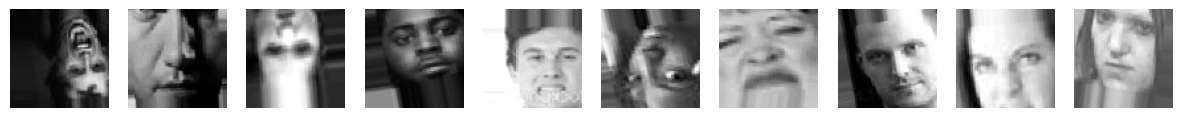

In [10]:
import matplotlib.pyplot as plt
from keras.preprocessing import image


original_images = train_generator.next()[0][:10]  # Tomamos las primeras 5 imágenes generadas

# Se visualizan
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(original_images[i])
    ax.axis('off')
plt.show()

In [16]:
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D, Flatten,GaussianNoise, BatchNormalization, Conv2D, Input
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L2
from keras.callbacks import EarlyStopping

# Modelo 1 CNN replicación paper 


In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Función Cosine Annealing para aplicar un descenso del learning rate
def cosine_annealing(epoch, lr):
    epochs = 300
    lr = 0.001
    decay_rate = 0.75
    return lr * (1 + math.cos(math.pi * epoch / epochs)) * 0.5 * decay_rate


input_shape = (48, 48, 3)
input_layer = Input(shape=input_shape)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)

output_layer = Dense(7, activation='softmax')(x)


model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])





Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_110 (Conv2D)         (None, 48, 48, 64)        1792      
                                                                 
 conv2d_111 (Conv2D)         (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_112 (Conv2D)         (None, 24, 24, 128)       73856     
                                                          

In [47]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/1-ModelPaper1/64batchDropout', exist_ok=True)

checkpoint_path = 'models/1-ModelPaper1/64batchDropout/best_model_ModelPaper1_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/1-ModelPaper1/64batchDropout', exist_ok=True)


log_dir = "logs/1-ModelPaper1/64batchDropout/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)




The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


64 batchs 1 regularizadores y Dropout

In [48]:
# Callback para el descenso del learning rate
lr_scheduler = LearningRateScheduler(cosine_annealing)


historyPaper1 = model.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[lr_scheduler, early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 6.0010 - accuracy: 0.1442
Epoch 1: val_accuracy improved from -inf to 0.17068, saving model to models/1-ModelPaper1/64batchDropout\best_model_ModelPaper1_1_0.1707.h5
670/670 [==============================] - 112s 165ms/step - loss: 6.0010 - accuracy: 0.1442 - val_loss: 5.9602 - val_accuracy: 0.1707 - lr: 7.5000e-04
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 5.9200 - accuracy: 0.1510
Epoch 2: val_accuracy did not improve from 0.17068
670/670 [==============================] - 132s 196ms/step - loss: 5.9200 - accuracy: 0.1510 - val_loss: 5.8799 - val_accuracy: 0.1434 - lr: 7.4998e-04
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 5.8398 - accuracy: 0.1582
Epoch 3: val_accuracy did not improve from 0.17068
670/670 [==============================] - 107s 160ms/step - loss: 5.8398 - accuracy: 0.1582 - val_loss: 5.8002 - val_accuracy: 0.1688 - lr: 7.4992e-04
Epoch 4/300

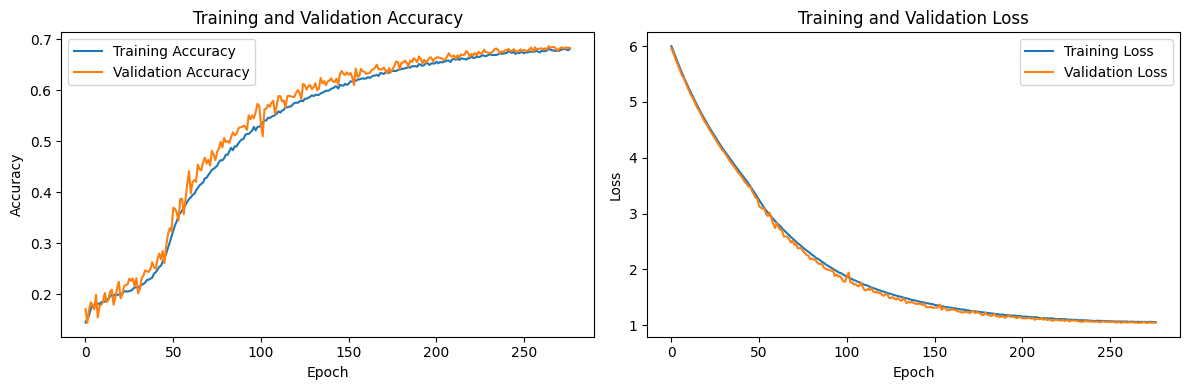

In [49]:
import matplotlib.pyplot as plt


accuracy = historyPaper1.history['accuracy']
loss = historyPaper1.history['loss']
val_accuracy = historyPaper1.history['val_accuracy']
val_loss = historyPaper1.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
#Evaluación del conjunto de testeo
results = model.evaluate(test_generator)

# Obtención de las etiquetas
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1) #Obtener etiquetas predichas

# Calcular el classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred)

print(class_report)

93/93 [==============================] - 4s 42ms/step
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       850
           1       0.98      0.95      0.96       850
           2       0.59      0.37      0.45       850
           3       0.79      0.86      0.82       850
           4       0.54      0.68      0.61       850
           5       0.51      0.60      0.55       850
           6       0.84      0.81      0.83       850

    accuracy                           0.69      5950
   macro avg       0.70      0.69      0.69      5950
weighted avg       0.70      0.69      0.69      5950



Text(95.72222222222221, 0.5, 'True labels')

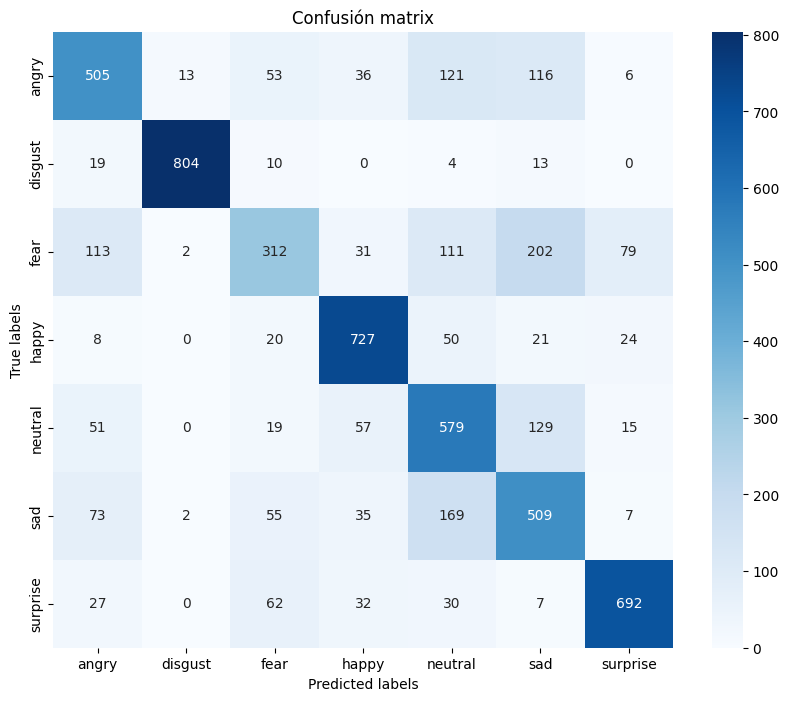

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matr = confusion_matrix(y_true, y_pred) #Calcular matriz de confusión
confusion_classes = test_generator.class_indices.keys()

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matr, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Modelo 2 CNN replicación paper




In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import math
from tensorflow.keras.regularizers import L2

In [39]:

input_shape = (48, 48, 3)
input_layer = Input(shape=input_shape)

#Modelo VGGNet
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)

output_layer = Dense(7, activation='softmax')(x)


modelPaper3 = Model(inputs=input_layer, outputs=output_layer)

modelPaper3.summary()

modelPaper3.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 conv2d_56 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_25 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 24, 24, 64)        0   

In [40]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/ModelPaper2/64batch', exist_ok=True)


checkpoint_path = 'models/ModelPaper2/64batch/best_model_ModelPaper2_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/ModelPaper2/64batch', exist_ok=True)



log_dir = "logs/ModelPaper2/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [41]:

historyPaper2 = modelPaper3.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 2.0751 - accuracy: 0.2001
Epoch 1: val_accuracy improved from -inf to 0.14538, saving model to models/ModelPaper2/64batch\best_model_ModelPaper2_1_0.1454.h5
670/670 [==============================] - 96s 141ms/step - loss: 2.0751 - accuracy: 0.2001 - val_loss: 5.3379 - val_accuracy: 0.1454
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 1.8249 - accuracy: 0.2758
Epoch 2: val_accuracy improved from 0.14538 to 0.17526, saving model to models/ModelPaper2/64batch\best_model_ModelPaper2_2_0.1753.h5
670/670 [==============================] - 92s 137ms/step - loss: 1.8249 - accuracy: 0.2758 - val_loss: 2.2651 - val_accuracy: 0.1753
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 1.6971 - accuracy: 0.3348
Epoch 3: val_accuracy improved from 0.17526 to 0.28011, saving model to models/ModelPaper2/64batch\best_model_ModelPaper2_3_0.2801.h5
670/670 [==============================] -

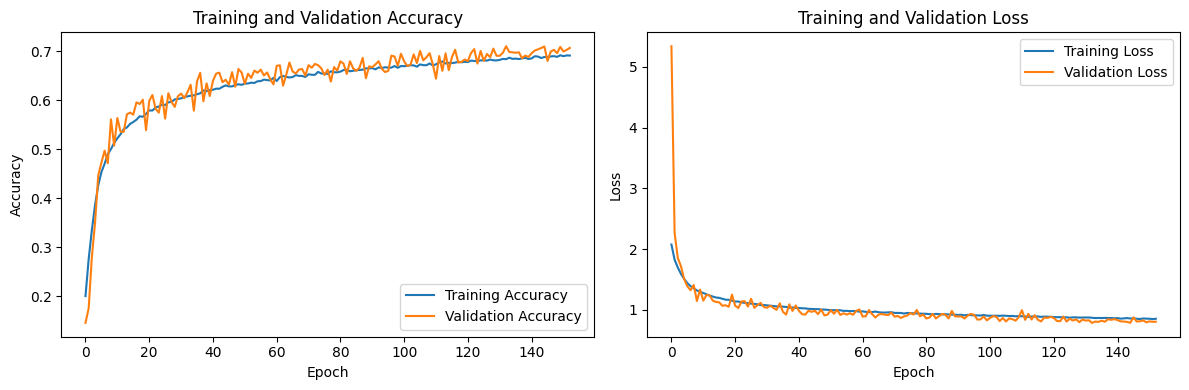

In [42]:
import matplotlib.pyplot as plt


accuracy = historyPaper2.history['accuracy']
loss = historyPaper2.history['loss']
val_accuracy = historyPaper2.history['val_accuracy']
val_loss = historyPaper2.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
#Evaluación del conjunto de testeo
results = modelPaper3.evaluate(test_generator)

# Obtención de las etiquetas
y_true = test_generator.classes
y_pred = modelPaper3.predict(test_generator).argmax(axis=1) #Obtener etiquetas predichas

# Calcular el classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred)

print(class_report)

93/93 [==============================] - 4s 39ms/step
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       850
           1       0.98      0.95      0.97       850
           2       0.64      0.35      0.45       850
           3       0.83      0.84      0.84       850
           4       0.58      0.73      0.65       850
           5       0.53      0.66      0.59       850
           6       0.83      0.86      0.85       850

    accuracy                           0.71      5950
   macro avg       0.72      0.71      0.71      5950
weighted avg       0.72      0.71      0.71      5950



Text(95.72222222222221, 0.5, 'True labels')

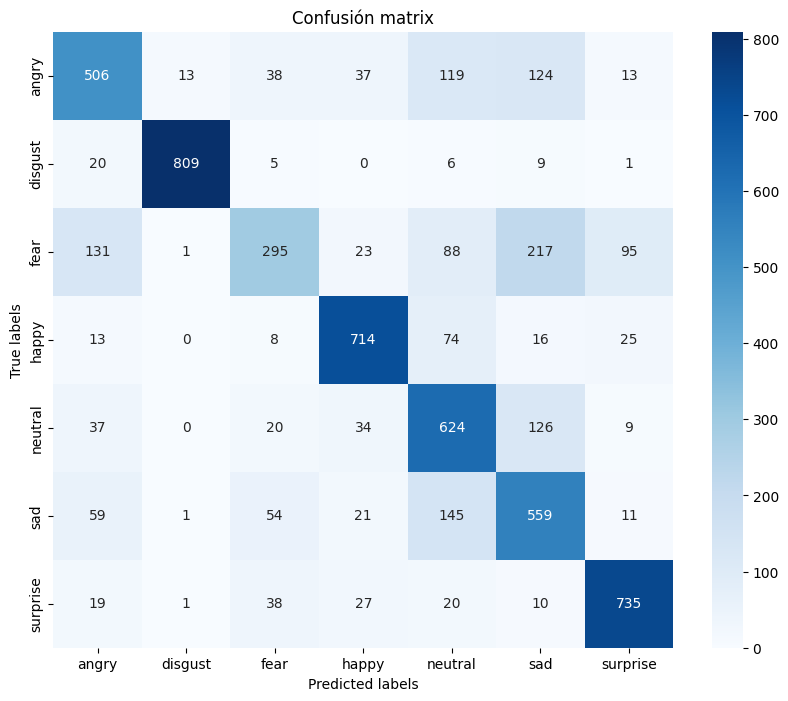

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matr = confusion_matrix(y_true, y_pred) #Calcular matriz de confusión
confusion_classes = test_generator.class_indices.keys()

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matr, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Model: InceptionV3

In [57]:
from keras.layers import Resizing

In [58]:
#Traer modelo
base_model_inceptionV3 = InceptionV3(weights= "imagenet", input_shape=(75,75,3), include_top=False)



for layer in base_model_inceptionV3.layers[:-10]:
    layer.trainable = False

input= Input(shape=(48,48,3))
input_resize = Resizing(75,75)(input) #Se redimensiona las imágenes a tamaño 75x75 que necesita el modelo

x = base_model_inceptionV3(input_resize)
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
x = Dropout(0.50)(x)
x = GlobalAveragePooling2D()(x)



x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)

modelInceptionV3 = Model(inputs = input, outputs = predictions)


modelInceptionV3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelInceptionV3.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 resizing_2 (Resizing)       (None, 75, 75, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 dropout_32 (Dropout)        (None, 1, 1, 2048)        0         
                                                                 
 batch_normalization_123 (Ba  (None, 1, 1, 2048)       8192      
 tchNormalization)                                               
                                                                 
 dropout_33 (Dropout)        (None, 1, 1, 2048)        0         
                                                          

In [59]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/InceptionV3/64batch', exist_ok=True)


checkpoint_path = 'models/InceptionV3/64batch/best_model_VGG19_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/InceptionV3/64batch', exist_ok=True)



log_dir = "logs/InceptionV3/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [60]:

historyInceptionV3 = modelInceptionV3.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 3.9684 - accuracy: 0.2390
Epoch 1: val_accuracy improved from -inf to 0.28385, saving model to models/InceptionV3/64batch\best_model_VGG19_1_0.2838.h5
670/670 [==============================] - 103s 146ms/step - loss: 3.9684 - accuracy: 0.2390 - val_loss: 3.0649 - val_accuracy: 0.2838
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 2.7929 - accuracy: 0.2693
Epoch 2: val_accuracy improved from 0.28385 to 0.33007, saving model to models/InceptionV3/64batch\best_model_VGG19_2_0.3301.h5
670/670 [==============================] - 96s 143ms/step - loss: 2.7929 - accuracy: 0.2693 - val_loss: 2.4978 - val_accuracy: 0.3301
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 2.4785 - accuracy: 0.2741
Epoch 3: val_accuracy did not improve from 0.33007
670/670 [==============================] - 95s 141ms/step - loss: 2.4785 - accuracy: 0.2741 - val_loss: 2.3832 - val_accuracy: 0.3198
Ep

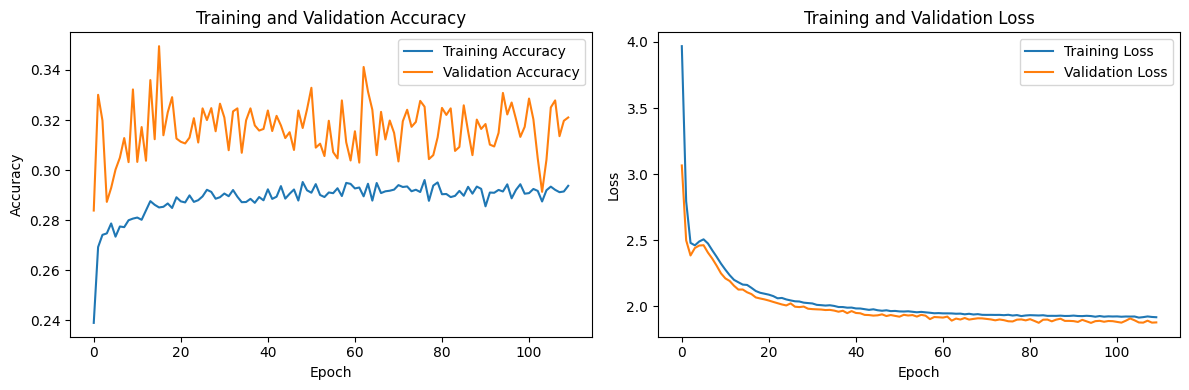

In [61]:
import matplotlib.pyplot as plt


accuracy = historyInceptionV3.history['accuracy']
loss = historyInceptionV3.history['loss']
val_accuracy = historyInceptionV3.history['val_accuracy']
val_loss = historyInceptionV3.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model: Resnet50

In [56]:
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam


#Traer modelo
base_modelResnet50 = ResNet50(weights= "imagenet", input_shape=(48,48,3), include_top=False)

for layer in base_modelResnet50.layers[:-10]:
    layer.trainable = False


x = base_modelResnet50.output
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)


x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)



modelResnet50 = Model(inputs = base_modelResnet50.inputs, outputs = predictions)


modelResnet50.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelResnet50.summary()


Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_27[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [57]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/Resnet50/64batch', exist_ok=True)


checkpoint_path = 'models/Resnet50/64batch/best_model_Effictnet_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/Resnet50/64batch', exist_ok=True)



log_dir = "logs/Resnet50/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [58]:

historyResnet50 = modelResnet50.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 3.3023 - accuracy: 0.1819
Epoch 1: val_accuracy improved from -inf to 0.18142, saving model to models/Resnet50/64batch\best_model_Effictnet_1_0.1814.h5
670/670 [==============================] - 104s 150ms/step - loss: 3.3023 - accuracy: 0.1819 - val_loss: 2.4528 - val_accuracy: 0.1814
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 2.2098 - accuracy: 0.1971
Epoch 2: val_accuracy did not improve from 0.18142
670/670 [==============================] - 97s 145ms/step - loss: 2.2098 - accuracy: 0.1971 - val_loss: 2.1253 - val_accuracy: 0.1550
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 2.0279 - accuracy: 0.2044
Epoch 3: val_accuracy did not improve from 0.18142
670/670 [==============================] - 97s 144ms/step - loss: 2.0279 - accuracy: 0.2044 - val_loss: 2.0714 - val_accuracy: 0.1477
Epoch 4/300
670/670 [==============================] - ETA: 0s - loss: 1.9682 

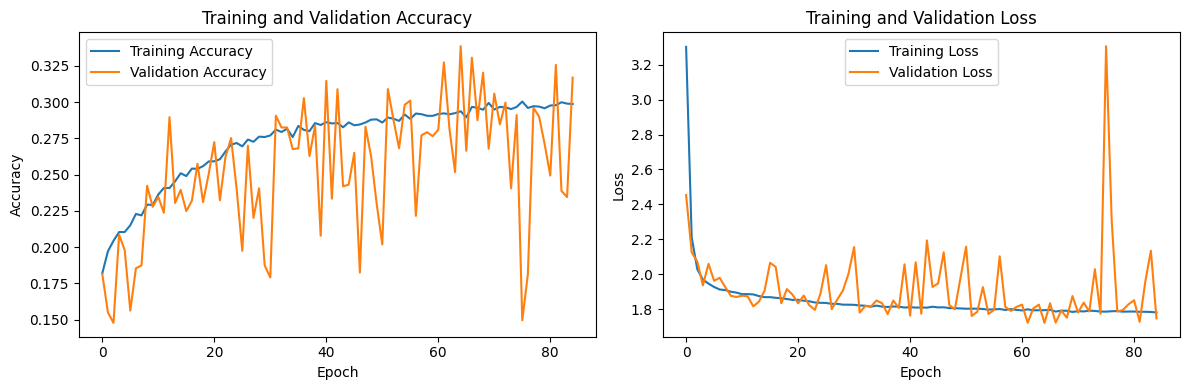

In [59]:
import matplotlib.pyplot as plt


accuracy = historyResnet50.history['accuracy']
loss = historyResnet50.history['loss']
val_accuracy = historyResnet50.history['val_accuracy']
val_loss = historyResnet50.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# VGG-19

In [32]:
from keras.applications import VGG19
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam


#Traer modelo
base_modelVGG = VGG19(weights= "imagenet", input_shape=(48,48,3), include_top=False)

#Congelar capas
for layer in base_modelVGG.layers[:-10]:
  layer.trainable = False

x = base_modelVGG.output
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
#x = MaxPooling2D(2,2)(x)
x = Dropout(0.50)(x)
x = GlobalAveragePooling2D()(x)


x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)

modelVGG19 = Model(inputs = base_modelVGG.inputs, outputs = predictions)


modelVGG19.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelVGG19.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [33]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/VGG19/64batch', exist_ok=True)

checkpoint_path = 'models/VGG19/64batch/best_model_VGG19_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/VGG19/64batch', exist_ok=True)


log_dir = "logs/VGG19/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [34]:

historyVGG19 = modelVGG19.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
    
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 2.1753 - accuracy: 0.1950
Epoch 1: val_accuracy improved from -inf to 0.21737, saving model to models/VGG19/64batch\best_model_VGG19_1_0.2174.h5
670/670 [==============================] - 107s 158ms/step - loss: 2.1753 - accuracy: 0.1950 - val_loss: 2.0624 - val_accuracy: 0.2174
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 1.9449 - accuracy: 0.2468
Epoch 2: val_accuracy improved from 0.21737 to 0.30719, saving model to models/VGG19/64batch\best_model_VGG19_2_0.3072.h5
670/670 [==============================] - 101s 151ms/step - loss: 1.9449 - accuracy: 0.2468 - val_loss: 1.8412 - val_accuracy: 0.3072
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 1.8334 - accuracy: 0.2751
Epoch 3: val_accuracy did not improve from 0.30719
670/670 [==============================] - 102s 152ms/step - loss: 1.8334 - accuracy: 0.2751 - val_loss: 1.8050 - val_accuracy: 0.2909
Epoch 4/300


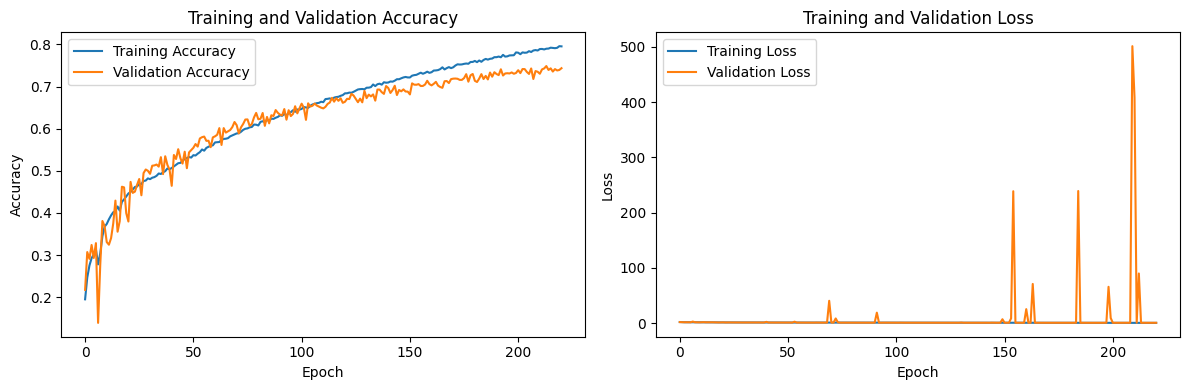

In [36]:
import matplotlib.pyplot as plt


accuracy = historyVGG19.history['accuracy']
loss = historyVGG19.history['loss']
val_accuracy = historyVGG19.history['val_accuracy']
val_loss = historyVGG19.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model Mini-Xception

In [23]:
from keras import layers
from keras.layers import Activation, Convolution2D, Conv2D, Dropout, AveragePooling2D, BatchNormalization, GlobalAveragePooling2D, Flatten, Input, MaxPooling2D, SeparableConv2D
from keras.models import Model
from keras.regularizers import L2

l2_regularization = 0.01
regularization = L2(l2_regularization)


image_input = Input((48,48,3))


x = Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), kernel_regularizer=regularization, use_bias=False)(image_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x= Dropout(0.25)(x)


# Modulo residual 
residual = Conv2D(filters=16, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x= Dropout(0.25)(x)


x = SeparableConv2D(filters=16, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=16, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])
x= Dropout(0.25)(x)


# Modulo residual 
residual = Conv2D(filters=32, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x= Dropout(0.25)(x)

x = SeparableConv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])
x= Dropout(0.25)(x)

# Modulo residual  
residual = Conv2D(filters=64, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x= Dropout(0.25)(x)

x = SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])
x= Dropout(0.25)(x)

# Modulo residual 
residual = Conv2D(filters=128, kernel_size=(1,1), strides=(2,2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)
x= Dropout(0.25)(x)

x = SeparableConv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularization, use_bias=False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.add([x,residual])
x= Dropout(0.25)(x)

x = Conv2D(filters=7, kernel_size=(3,3), padding='same')(x)
x = GlobalAveragePooling2D()(x)
x= Dropout(0.5)(x)

output = Activation('softmax', name='predictions')(x)


modelMini = Model(image_input, output)
modelMini.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelMini.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 46, 46, 8)    216         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 46, 46, 8)   32          ['conv2d[0][0]']                 
 rmalization)                                                                                     
                                                                                                  
 activation (Activation)        (None, 46, 46, 8)    0           ['batch_normalization_2[0][

In [24]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/modelMini/64batch', exist_ok=True)


checkpoint_path = 'models/modelMini/64batch/best_model_modelMini_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/modelMini/64batch', exist_ok=True)


log_dir = "logs/modelMini/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [26]:

historyMini = modelMini.fit(
    train_generator,
    epochs=200,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]

)

Epoch 1/200
670/670 [==============================] - ETA: 0s - loss: 2.0951 - accuracy: 0.1699
Epoch 1: val_accuracy improved from -inf to 0.23483, saving model to models/modelMini/64batch\best_model_modelMini_1_0.2348.h5
670/670 [==============================] - 91s 135ms/step - loss: 2.0951 - accuracy: 0.1699 - val_loss: 1.8946 - val_accuracy: 0.2348
Epoch 2/200
670/670 [==============================] - ETA: 0s - loss: 1.9481 - accuracy: 0.1997
Epoch 2: val_accuracy did not improve from 0.23483
670/670 [==============================] - 90s 134ms/step - loss: 1.9481 - accuracy: 0.1997 - val_loss: 2.1874 - val_accuracy: 0.1432
Epoch 3/200
670/670 [==============================] - ETA: 0s - loss: 1.9036 - accuracy: 0.2144
Epoch 3: val_accuracy did not improve from 0.23483
670/670 [==============================] - 90s 134ms/step - loss: 1.9036 - accuracy: 0.2144 - val_loss: 2.0333 - val_accuracy: 0.1964
Epoch 4/200
670/670 [==============================] - ETA: 0s - loss: 1.8874 

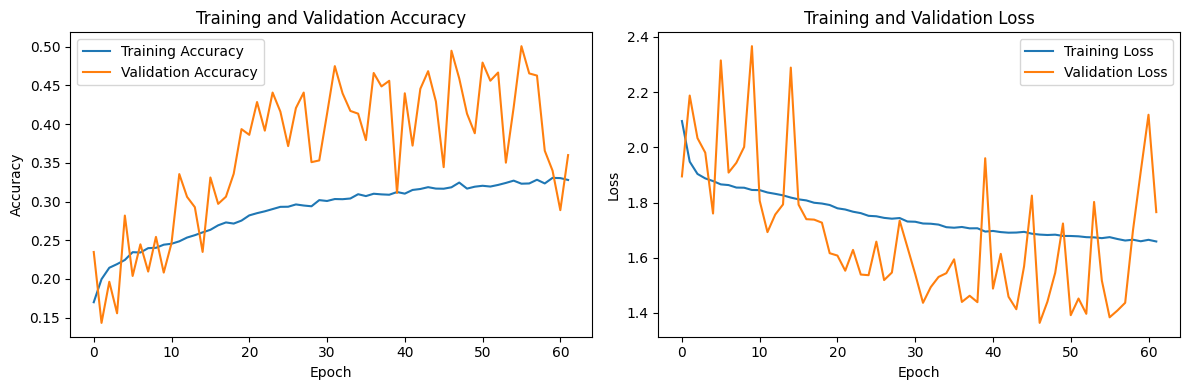

In [27]:
import matplotlib.pyplot as plt


accuracy = historyMini.history['accuracy']
loss = historyMini.history['loss']
val_accuracy = historyMini.history['val_accuracy']
val_loss = historyMini.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Optimización de modelos mediante Keras Tunner, obteniendo mejor resultado

In [61]:
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


C:\Users\bryan\AppData\Local\Temp\ipykernel_21368\847104587.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


In [31]:
def build_model(hp):
    input_shape = (48, 48, 3)
    input_layer = Input(shape=input_shape)

    # Hiperparámetros para la configuración dinámica de capas
    num_conv_layers = hp.Int('num_conv_layers', min_value=2, max_value=6, step=1)
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, step=1)
    num_filters = hp.Choice('num_filters', values=[64, 128, 256])
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])


    # Definición de las capas dinámicas
    x = input_layer
    for i in range(num_conv_layers):
        x = Conv2D(num_filters, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(dropout_rate)(x)

    x = Flatten()(x)

    # Capas Dense dinámicas
    for i in range(num_dense_layers):
        x = Dense(hp.Int(f'dense_units_{i}', min_value=512, max_value=2048, step=256), activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    output_layer = Dense(7, activation='softmax')(x)

    optimizer = Adam(learning_rate=hp_learning_rate)


    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [32]:
tuner = RandomSearch( #se aplica RandomSerach
    build_model,
    objective='val_accuracy', #Busca como objetivo el que tenga el val_accuracy más alto
    max_trials=10,  # 10 intentos para encontrar la configuración más optima
    directory='keras_tuner_logs',  
    project_name='my_tuning_project'  
)


In [33]:
tuner.search(train_generator,
             epochs=80,  #cada intento con 80 epocas
             validation_data=val_generator)


Trial 10 Complete [02h 08m 20s]
val_accuracy: 0.6927170753479004

Best val_accuracy So Far: 0.6927170753479004
Total elapsed time: 17h 04m 48s


In [35]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/modelKerasTuner/64batch', exist_ok=True)


checkpoint_path = 'models/modelKerasTuner/64batch/best_model_modelKerasTuner_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/modelKerasTuner/64batch', exist_ok=True)



log_dir = "logs/modelKerasTuner/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [36]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #Se obtiene la mejor configuración
modelTuner = tuner.hypermodel.build(best_hps) #se crea el modelo
modelTuner.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 256)       7168      
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 256)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 256)       5900

## 64 batch

In [37]:

historyTuner = modelTuner.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 2.0514 - accuracy: 0.2211
Epoch 1: val_accuracy improved from -inf to 0.22232, saving model to models/modelKerasTuner/64batch\best_model_modelKerasTuner_1_0.2223.h5
670/670 [==============================] - 99s 146ms/step - loss: 2.0514 - accuracy: 0.2211 - val_loss: 2.3477 - val_accuracy: 0.2223
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 1.7930 - accuracy: 0.2728
Epoch 2: val_accuracy improved from 0.22232 to 0.30364, saving model to models/modelKerasTuner/64batch\best_model_modelKerasTuner_2_0.3036.h5
670/670 [==============================] - 98s 146ms/step - loss: 1.7930 - accuracy: 0.2728 - val_loss: 1.7491 - val_accuracy: 0.3036
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 1.7466 - accuracy: 0.2965
Epoch 3: val_accuracy did not improve from 0.30364
670/670 [==============================] - 96s 143ms/step - loss: 1.7466 - accuracy: 0.2965 - val_loss: 1.905

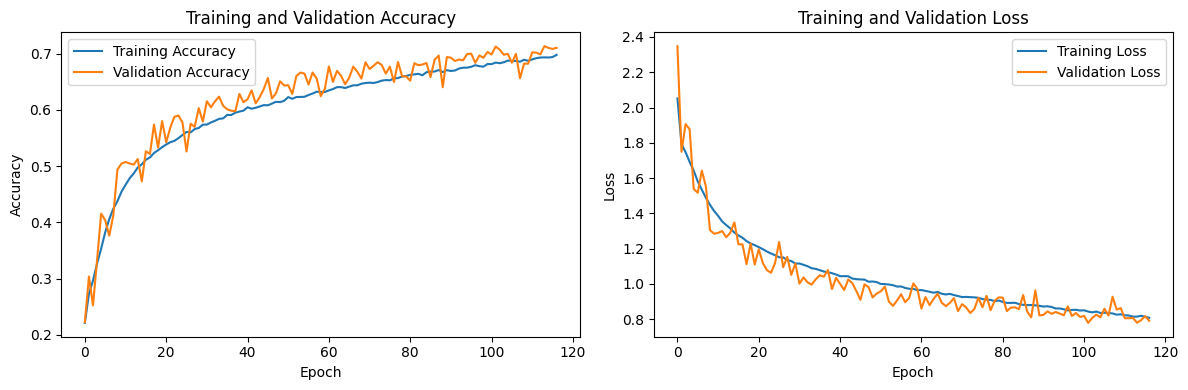

In [38]:
import matplotlib.pyplot as plt


accuracy = historyTuner.history['accuracy']
loss = historyTuner.history['loss']
val_accuracy = historyTuner.history['val_accuracy']
val_loss = historyTuner.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Análisis de métricas 64 batch

In [63]:
model_keras_tunner = tf.keras.models.load_model('models/Model 3 Keras tunner/modelKerasTuner/64batch/best_model_modelKerasTuner_114_0.7132.h5')
model_keras_tunner.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 256)       7168      
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 256)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 256)       5900

In [9]:

# Evaluar el modelo en el conjunto de test
results = model_keras_tunner.evaluate(test_generator)
print("Evaluación conjunto de testeo keras tunner",results)

# Obtener las etiquetas verdaderas y las predicciones del modelo en el conjunto de test
y_true = test_generator.classes
y_pred = model_keras_tunner.predict(test_generator).argmax(axis=1)

# Calcular el classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred)

print(class_report)

93/93 [==============================] - 21s 129ms/step - loss: 0.7615 - accuracy: 0.7255
Evaluación conjunto de testeo keras tunner [0.7615017890930176, 0.7255462408065796]
93/93 [==============================] - 4s 36ms/step
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       850
           1       0.99      0.95      0.97       850
           2       0.72      0.41      0.52       850
           3       0.76      0.88      0.81       850
           4       0.57      0.73      0.64       850
           5       0.58      0.61      0.59       850
           6       0.85      0.87      0.86       850

    accuracy                           0.73      5950
   macro avg       0.73      0.73      0.72      5950
weighted avg       0.73      0.73      0.72      5950



Text(95.72222222222221, 0.5, 'True labels')

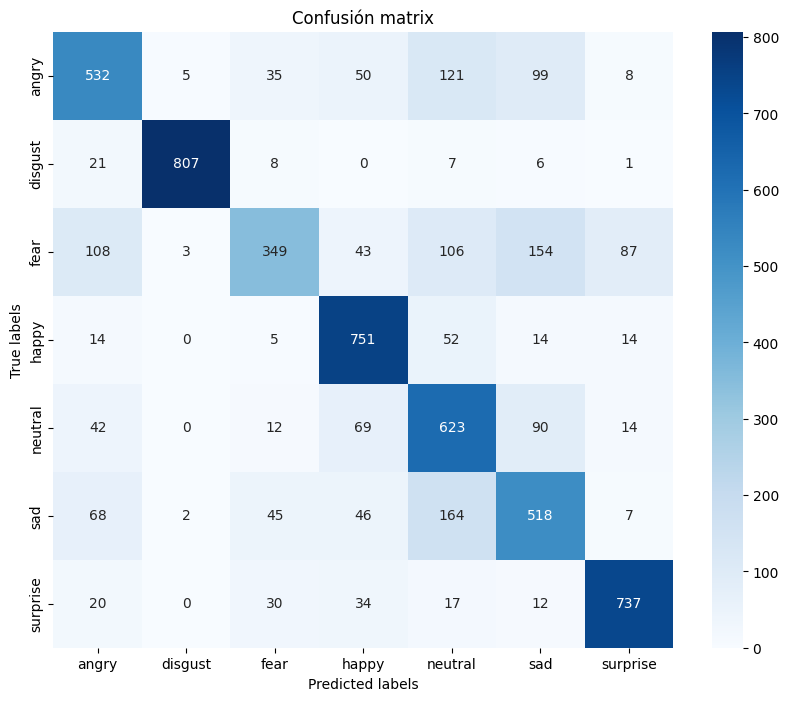

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matr = confusion_matrix(y_true, y_pred)
confusion_classes = test_generator.class_indices.keys()

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matr, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

93/93 [==============================] - 4s 41ms/step


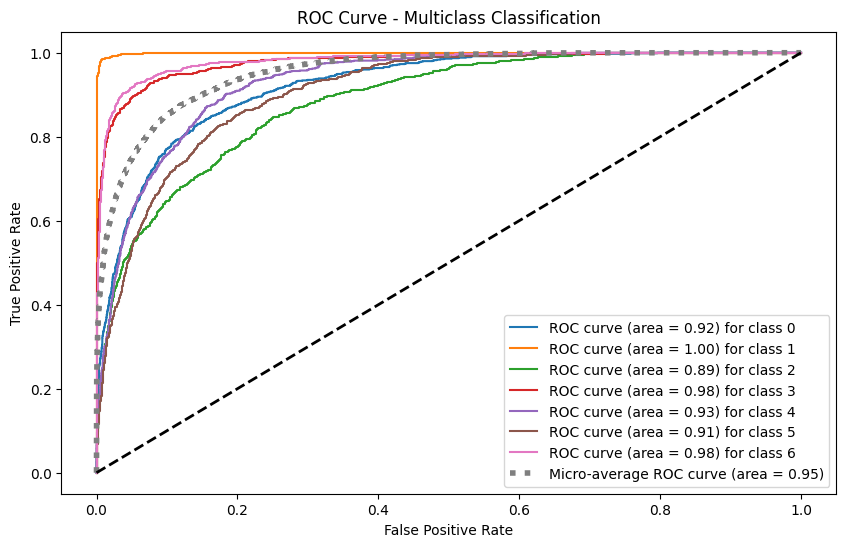

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Se obtiene la predicción de las clases
y_score = model_keras_tunner.predict(test_generator)

# Se transofmra los valores a numéricos para ingresar a la curva de ROC
lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)

# Calculo de la curva de ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculo de micro-average ROC y AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize=(10, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

## 128 batch (mejor hasta el momento)

In [78]:
from keras.layers import Input, Conv2D, BatchNormalization, Dropout, Dense,Flatten
from keras.optimizers import Adam

InputKeras = Input(shape=(48,48,3))


x = Conv2D(256, (3,3), activation="relu",padding="same")(InputKeras)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.2)(x)

x = Conv2D(256, (3,3), activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.2)(x)

x = Conv2D(256, (3,3), activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.2)(x)

x = Conv2D(256, (3,3), activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(1792, activation="relu")(x)
x = Dropout(0.2)(x)
prediction = Dense(7, activation="softmax")(x)

ModelKerasCompleto = Model(inputs=InputKeras, outputs=prediction)

ModelKerasCompleto.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

ModelKerasCompleto.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 48, 48, 256)       7168      
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 24, 24, 256)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 256)       590

In [80]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [81]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/modelKerasTuner/128batch', exist_ok=True)


checkpoint_path = 'models/modelKerasTuner/128batch/best_model_modelKerasTuner_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/modelKerasTuner/128batch', exist_ok=True)



log_dir = "logs/modelKerasTuner/128batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [82]:
historyTunerCompleto100batch = ModelKerasCompleto.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
335/335 [==============================] - ETA: 0s - loss: 2.1150 - accuracy: 0.2104
Epoch 1: val_accuracy improved from -inf to 0.15686, saving model to models/modelKerasTuner/128batch\best_model_modelKerasTuner_1_0.1569.h5
335/335 [==============================] - 166s 473ms/step - loss: 2.1150 - accuracy: 0.2104 - val_loss: 2.9885 - val_accuracy: 0.1569
Epoch 2/300
335/335 [==============================] - ETA: 0s - loss: 1.8192 - accuracy: 0.2638
Epoch 2: val_accuracy improved from 0.15686 to 0.25649, saving model to models/modelKerasTuner/128batch\best_model_modelKerasTuner_2_0.2565.h5
335/335 [==============================] - 96s 287ms/step - loss: 1.8192 - accuracy: 0.2638 - val_loss: 2.1305 - val_accuracy: 0.2565
Epoch 3/300
335/335 [==============================] - ETA: 0s - loss: 1.7653 - accuracy: 0.2860
Epoch 3: val_accuracy did not improve from 0.25649
335/335 [==============================] - 97s 288ms/step - loss: 1.7653 - accuracy: 0.2860 - val_loss: 2.

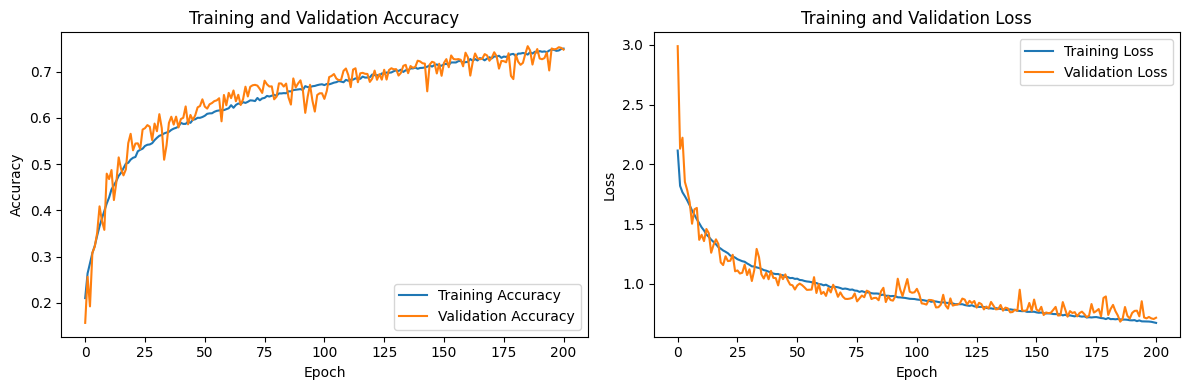

In [83]:
import matplotlib.pyplot as plt


accuracy = historyTunerCompleto100batch.history['accuracy']
loss = historyTunerCompleto100batch.history['loss']
val_accuracy = historyTunerCompleto100batch.history['val_accuracy']
val_loss = historyTunerCompleto100batch.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Analisis de métricas y GradCam

In [84]:
# Evaluar el modelo en el conjunto de test
results = ModelKerasCompleto.evaluate(test_generator)
print("Evaluación conjunto de testeo keras tunner",results)

# Obtener las etiquetas verdaderas y las predicciones del modelo en el conjunto de test
y_true = test_generator.classes
y_pred = ModelKerasCompleto.predict(test_generator).argmax(axis=1)

# Calcular el classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_true, y_pred)

print(class_report)

47/47 [==============================] - 12s 247ms/step - loss: 0.6525 - accuracy: 0.7639
Evaluación conjunto de testeo keras tunner [0.6524535417556763, 0.7638655304908752]
47/47 [==============================] - 4s 74ms/step
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       850
           1       0.98      0.98      0.98       850
           2       0.75      0.54      0.63       850
           3       0.83      0.87      0.85       850
           4       0.61      0.75      0.67       850
           5       0.63      0.60      0.62       850
           6       0.87      0.90      0.89       850

    accuracy                           0.76      5950
   macro avg       0.77      0.76      0.76      5950
weighted avg       0.77      0.76      0.76      5950



Text(95.72222222222221, 0.5, 'True labels')

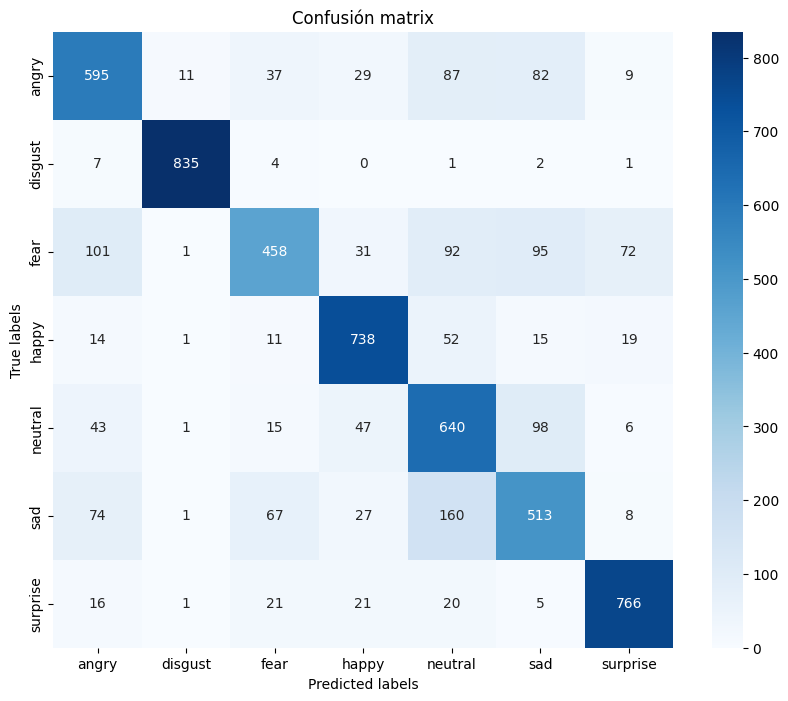

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matr = confusion_matrix(y_true, y_pred)
confusion_classes = test_generator.class_indices.keys()

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matr, annot=True,fmt='d', cmap='Blues', xticklabels=confusion_classes, yticklabels=confusion_classes)
plt.title('Confusión matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

47/47 [==============================] - 4s 80ms/step


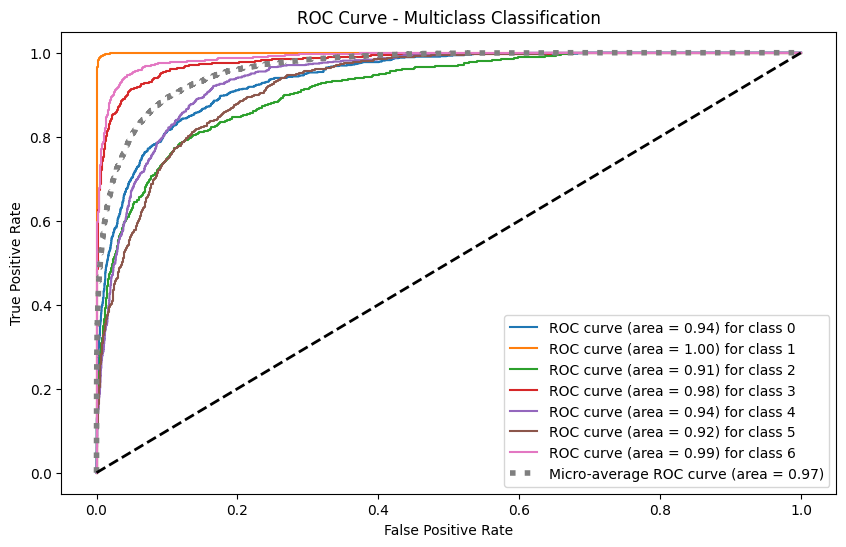

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Se obtiene la predicción de las clases
y_score = ModelKerasCompleto.predict(test_generator)

# Se transofmra los valores a numéricos para ingresar a la curva de ROC
lb = LabelBinarizer()
y_true_bin = lb.fit_transform(y_true)

# Calculo de la curva de ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculo de micro-average ROC y AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize=(10, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

In [13]:
ModelKeras128batch = tf.keras.models.load_model('models/modelKerasTuner/128batch/best_model_modelKerasTuner_186_0.7548.h5')
ModelKeras128batch.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 48, 48, 256)       7168      
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 24, 24, 256)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 256)       590

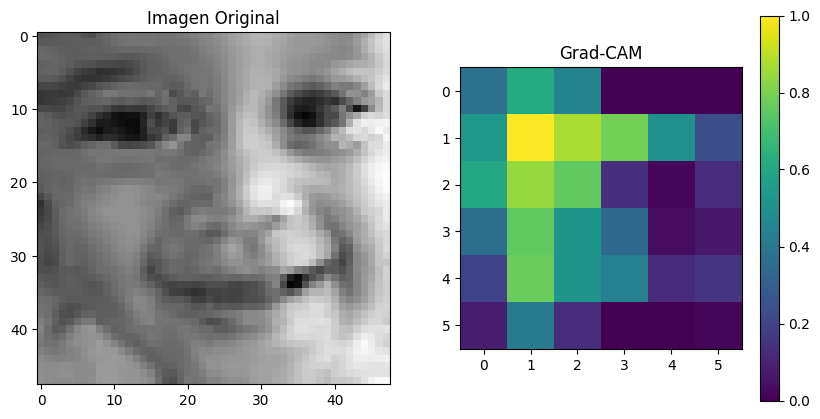

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from IPython.display import Image
import matplotlib as mpl
import matplotlib


# Imágen a analizar
img_path = 'data/happy/aug_0_20.jpeg'
img = image.load_img(img_path, target_size=(48, 48))  #Se redimensiona al tamaño del modelo
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Función para el gradCam de Keras
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.device('/CPU:0'): #Para que ocupe la CPU
        with tf.GradientTape() as tape:
            last_conv_layer_output, preds = grad_model(img_array)
            if pred_index is None:
                pred_index = tf.argmax(preds[0])
            class_channel = preds[:, pred_index]

        grads = tape.gradient(class_channel, last_conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        last_conv_layer_output = last_conv_layer_output[0]
        heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

# Nombre de la ultima capa convolucional del modelo
last_conv_layer_name = 'conv2d_27'  

# Se genera el mapa de calor que es el GradCam
heatmap = make_gradcam_heatmap(x, ModelKeras128batch, last_conv_layer_name)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(heatmap)
plt.title('Grad-CAM')
plt.colorbar()
plt.show()

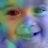

In [18]:
# Función para guardar y mostrar el Grad-CAM, de Keras
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Se rescala el mapa de calor en 0-255
    heatmap = np.uint8(255 * heatmap)

    # Colorear el mapa de calor
    jet = matplotlib.colormaps.get_cmap("jet")


    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]


    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)

    # Se guarda la imágen
    superimposed_img.save(cam_path)

    # Mostrar la Imagen con tamaño 224x224 para que se puede visualizar de mejor manera
    display(Image(cam_path, height=224, width=224))

# Llamar la función
save_and_display_gradcam(img_path, heatmap)

# Model: Xception-Net

In [52]:
from keras.applications import Xception
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D, Resizing, Input
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L2 


#Traer modelo
base_modelXception = Xception(weights= "imagenet", input_shape=(75,75,3), include_top=False)

#Congelar capas
for layer in base_modelXception.layers[:-10]:
  layer.trainable = False

input= Input(shape=(48,48,3))
input_resize = Resizing(75,75)(input) #Debido que XceptionNet necesita entrada con tamaño 75x75 se redimensiona

x = base_modelXception(input_resize)
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
x = Dropout(0.50)(x)
x = GlobalAveragePooling2D()(x)

x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)

modelXception = Model(inputs = input, outputs = predictions)

modelXception.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelXception.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 75, 75, 3)         0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 dropout_29 (Dropout)        (None, 3, 3, 2048)        0         
                                                                 
 batch_normalization_28 (Bat  (None, 3, 3, 2048)       8192      
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 3, 3, 2048)        0         
                                                           

In [54]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/modelXception/64batch', exist_ok=True)


checkpoint_path = 'models/modelXception/64batch/best_model_modelXception_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/modelXception/64batch', exist_ok=True)



log_dir = "logs/modelXception/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [55]:

historyXception = modelXception.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 2.9427 - accuracy: 0.3695
Epoch 1: val_accuracy improved from -inf to 0.44827, saving model to models/modelXception/64batch\best_model_modelXception_1_0.4483.h5
670/670 [==============================] - 169s 245ms/step - loss: 2.9427 - accuracy: 0.3695 - val_loss: 2.0212 - val_accuracy: 0.4483
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 1.8686 - accuracy: 0.4362
Epoch 2: val_accuracy improved from 0.44827 to 0.46190, saving model to models/modelXception/64batch\best_model_modelXception_2_0.4619.h5
670/670 [==============================] - 100s 148ms/step - loss: 1.8686 - accuracy: 0.4362 - val_loss: 1.6811 - val_accuracy: 0.4619
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 1.7412 - accuracy: 0.4539
Epoch 3: val_accuracy improved from 0.46190 to 0.48478, saving model to models/modelXception/64batch\best_model_modelXception_3_0.4848.h5
670/670 [===================

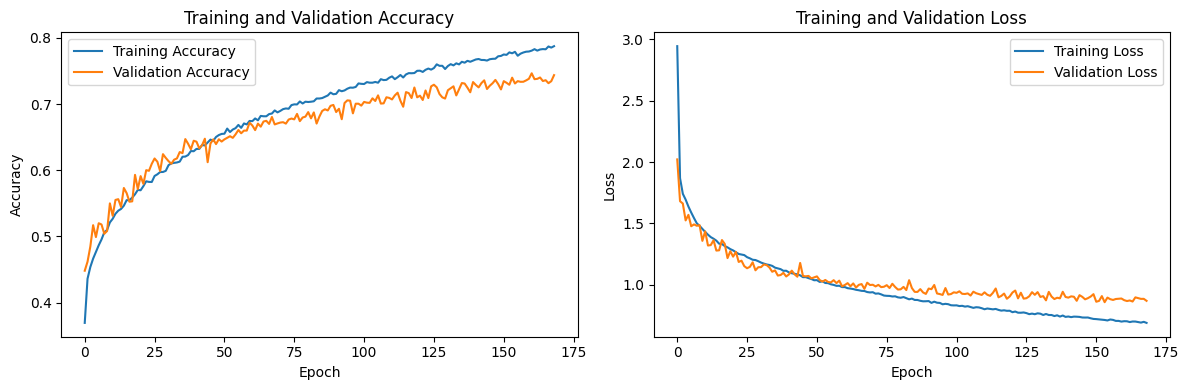

In [56]:
import matplotlib.pyplot as plt


accuracy = historyXception.history['accuracy']
loss = historyXception.history['loss']
val_accuracy = historyXception.history['val_accuracy']
val_loss = historyXception.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model: MobileNet

In [38]:
from keras.applications import MobileNetV2
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam


#Traer modelo
base_modelMobileNetV2 = MobileNetV2(weights= "imagenet", input_shape=(48,48,3), include_top=False)

#Congelar capas
for layer in base_modelMobileNetV2.layers[:-10]:
  layer.trainable = False

x = base_modelMobileNetV2.output
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
#x = MaxPooling2D(2,2)(x)
x = Dropout(0.50)(x)
x = GlobalAveragePooling2D()(x)

x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)

modelMobileNetV2 = Model(inputs = base_modelMobileNetV2.inputs, outputs = predictions)


modelMobileNetV2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelMobileNetV2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_11[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [39]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/MobileNet/64batch', exist_ok=True)

checkpoint_path = 'models/MobileNet/64batch/best_model_VGG19_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/MobileNet/64batch', exist_ok=True)


log_dir = "logs/MobileNet/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [40]:

historyMobileNet = modelMobileNetV2.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]
    
)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 3.1498 - accuracy: 0.2737
Epoch 1: val_accuracy improved from -inf to 0.19038, saving model to models/MobileNet/64batch\best_model_VGG19_1_0.1904.h5
670/670 [==============================] - 107s 151ms/step - loss: 3.1498 - accuracy: 0.2737 - val_loss: 7.5940 - val_accuracy: 0.1904
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 2.0929 - accuracy: 0.3249
Epoch 2: val_accuracy improved from 0.19038 to 0.28618, saving model to models/MobileNet/64batch\best_model_VGG19_2_0.2862.h5
670/670 [==============================] - 90s 134ms/step - loss: 2.0929 - accuracy: 0.3249 - val_loss: 2.4882 - val_accuracy: 0.2862
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 1.8942 - accuracy: 0.3376
Epoch 3: val_accuracy improved from 0.28618 to 0.34762, saving model to models/MobileNet/64batch\best_model_VGG19_3_0.3476.h5
670/670 [==============================] - 89s 133ms/step - loss:

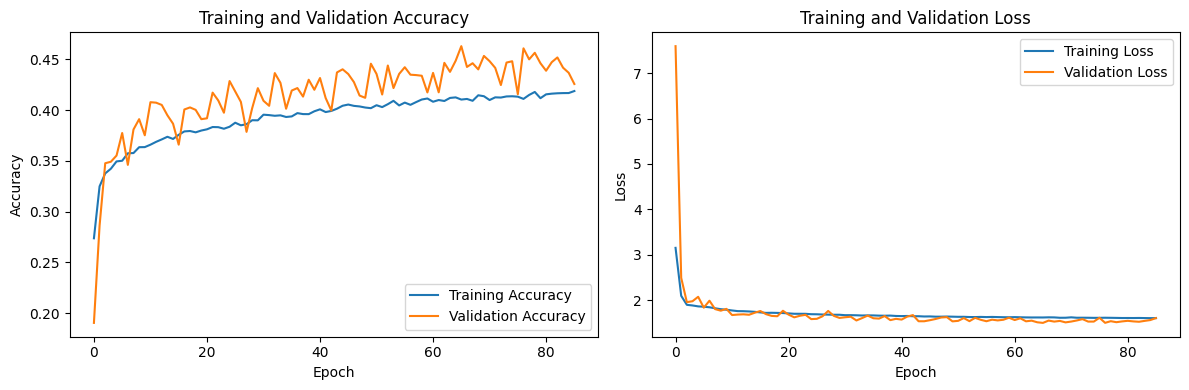

In [42]:
import matplotlib.pyplot as plt


accuracy = historyMobileNet.history['accuracy']
loss = historyMobileNet.history['loss']
val_accuracy = historyMobileNet.history['val_accuracy']
val_loss = historyMobileNet.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model: DenseNet

In [45]:
from keras.applications import DenseNet121
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam


#Traer modelo
base_modelDenseNet = DenseNet121(weights= "imagenet", input_shape=(48,48,3), include_top=False)

#Congelar capas
for layer in base_modelDenseNet.layers[:-10]:
  layer.trainable = False

x = base_modelDenseNet.output
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
#x = MaxPooling2D(2,2)(x)
x = Dropout(0.50)(x)
x = GlobalAveragePooling2D()(x)


x = Dense(2048, activation='relu', kernel_regularizer=L2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation="softmax")(x)

modelDense = Model(inputs = base_modelDenseNet.inputs, outputs = predictions)


modelDense.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelDense.summary()

modelDense.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 54, 54, 3)   0           ['input_7[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d_6[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']       

In [47]:
#--------Early stopping---------
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



#--------------------Checkpoint--------------------

os.makedirs('models/DenseNet/64batch', exist_ok=True)


checkpoint_path = 'models/DenseNet/64batch/best_model_DenseNet_{epoch}_{val_accuracy:.4f}.h5'

# Callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

#----------------Tensorboard-------------------
%load_ext tensorboard


os.makedirs('logs/DenseNet/64batch', exist_ok=True)



log_dir = "logs/DenseNet/64batch" + datetime.now().strftime("%Y%m%d-%H%M%S")


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [48]:
historyDense = modelDense.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping,model_checkpoint, tensorboard_callback]

)

Epoch 1/300
670/670 [==============================] - ETA: 0s - loss: 2.9544 - accuracy: 0.2586
Epoch 1: val_accuracy improved from -inf to 0.32213, saving model to models/DenseNet/64batch\best_model_DenseNet_1_0.3221.h5
670/670 [==============================] - 113s 157ms/step - loss: 2.9544 - accuracy: 0.2586 - val_loss: 2.3363 - val_accuracy: 0.3221
Epoch 2/300
670/670 [==============================] - ETA: 0s - loss: 2.2206 - accuracy: 0.3179
Epoch 2: val_accuracy improved from 0.32213 to 0.36685, saving model to models/DenseNet/64batch\best_model_DenseNet_2_0.3669.h5
670/670 [==============================] - 100s 148ms/step - loss: 2.2206 - accuracy: 0.3179 - val_loss: 1.9916 - val_accuracy: 0.3669
Epoch 3/300
670/670 [==============================] - ETA: 0s - loss: 2.0358 - accuracy: 0.3314
Epoch 3: val_accuracy did not improve from 0.36685
670/670 [==============================] - 97s 144ms/step - loss: 2.0358 - accuracy: 0.3314 - val_loss: 1.9418 - val_accuracy: 0.3526
E

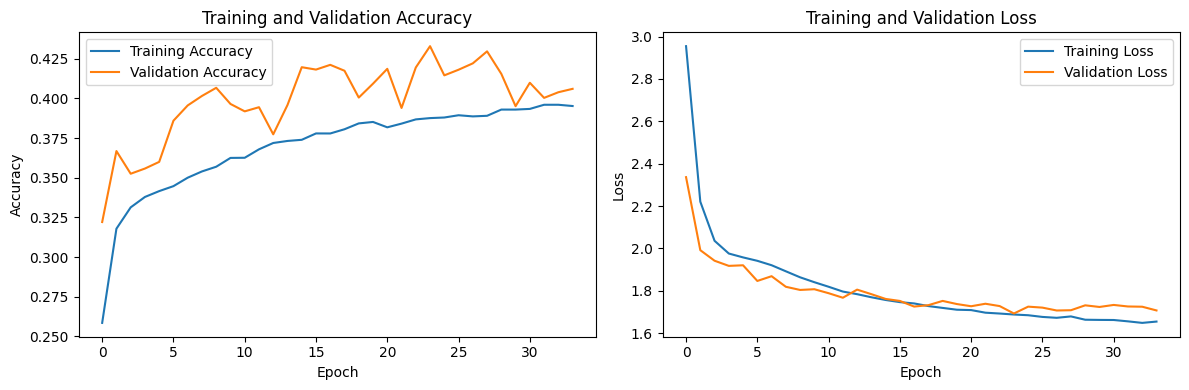

In [49]:
import matplotlib.pyplot as plt


accuracy = historyDense.history['accuracy']
loss = historyDense.history['loss']
val_accuracy = historyDense.history['val_accuracy']
val_loss = historyDense.history['val_loss']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()